In [1]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
from skimage.io import imread
from random import randint
import numpy as np
import utils


In [2]:
cut_img_paths = glob.glob("./Kotelet/Cut/*.png")
glove_img_paths = glob.glob("./Kotelet/Glove/*.png")
normal_img_paths = glob.glob("./Kotelet/Normal/*.png")
print("Amount of cut kotlet images =", len(cut_img_paths))
print("Amount of glove kotlet images =", len(glove_img_paths))
print("Amount of normal kotlet images =", len(normal_img_paths))
img = imread(glove_img_paths[0])
print("Image shape: " + str(img.shape))

Amount of cut kotlet images = 110
Amount of glove kotlet images = 65
Amount of normal kotlet images = 210
Image shape: (400, 400, 3)


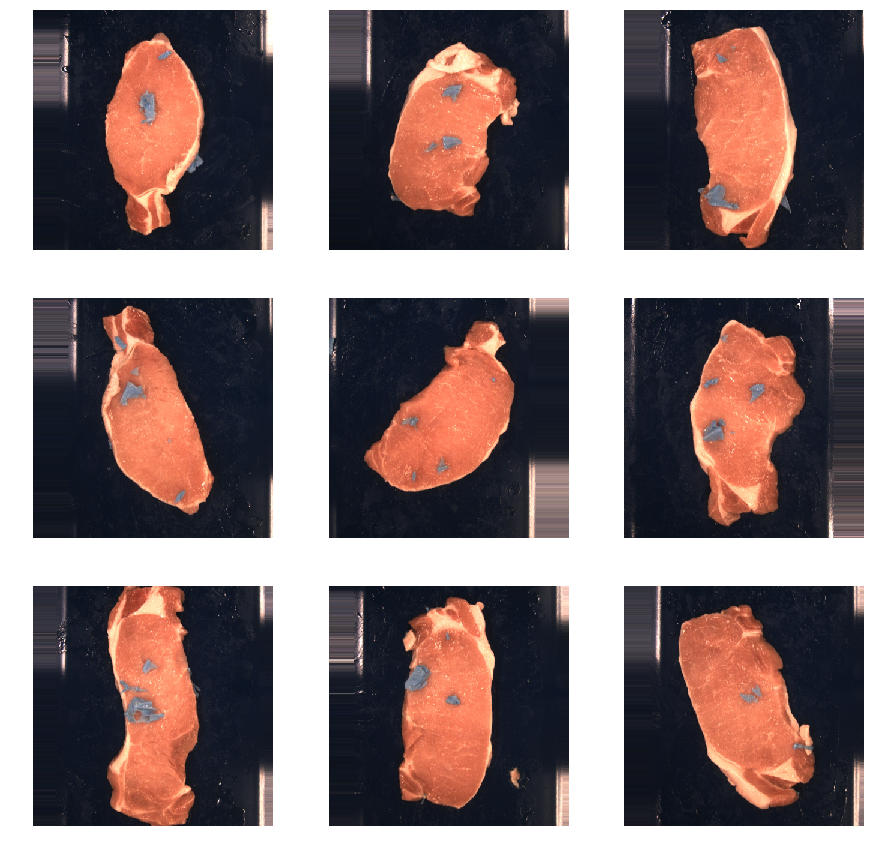

In [3]:
def plot_first_nine(img_paths):
    fig = plt.figure(figsize=(15, 15))
    for i, img_path in enumerate(img_paths[0:9]):
        plt.subplot(3, 3, i + 1)
        image = imread(img_path)
        plt.imshow(image)
        plt.axis('off')

    plt.show()

    
plot_first_nine(glove_img_paths)
#plot_first_nine(cut_img_paths)
#plot_first_nine(normal_img_paths)

In [4]:
from tensorflow.contrib.layers import fully_connected, convolution2d, flatten, batch_norm, max_pool2d, dropout
from tensorflow.python.ops.nn import relu, elu, relu6, sigmoid, tanh, softmax


# wrapping conv with batch_norm
def conv(l_in, num_outputs, kernel_size, scope, stride=1):
    return convolution2d(l_in, num_outputs=num_outputs, kernel_size=kernel_size,
                         stride=stride, normalizer_fn=batch_norm, scope=scope)

# pre-activation: http://arxiv.org/abs/1603.05027
# wrapping convolutions and batch_norm
def conv_pre(l_in, num_outputs, kernel_size, scope, stride=1):
    l_norm = batch_norm(l_in)
    l_relu = relu(l_norm)
    return convolution2d(l_relu, num_outputs=num_outputs, kernel_size=kernel_size,
                         stride=stride, activation_fn=None, scope=scope)

# easy to use pool function
def pool(l_in, scope, kernel_size=(3, 3)):
    return max_pool2d(l_in, kernel_size=kernel_size, scope=scope) # (3, 3) has shown to work better than (2, 2)

In [5]:
height, width, channels = IMAGE_SHAPE = (400, 400, 3)

# Defining computation graph
tf.reset_default_graph()
x_image_pl = tf.placeholder(tf.float32, [None, height, width, channels], name="x-image_pl")

construction_time_shape = x_image_pl.get_shape()
runtime_shape = tf.shape(x_image_pl)
print("x_image_pl", construction_time_shape)
#g = tf.matmul(a=[[1,0],[0,0]], b=[[4,4],[4,4]])


with tf.name_scope('image-features'):
    l_conv1_a = conv(x_image_pl, 16, (5, 5), scope="l-conv1_a")
    l_pool1 = pool(l_conv1_a, scope="l-pool1")
    l_flatten = flatten(l_pool1, scope="flatten")

features = l_flatten

l2 = fully_connected(features, num_outputs=256, activation_fn=relu,
                     normalizer_fn=batch_norm, scope="l2")

y = fully_connected(l2, 3, activation_fn=softmax, scope="y")



x_image_pl (?, 400, 400, 3)


In [11]:
tf.summary.merge_all()
sess = tf.Session()
tmp_def=sess.graph_def
#tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))
utils.show_graph(tmp_def)


In [12]:
#cut_imgs = np.asarray([imread(img) for img in cut_img_paths])
imgs = np.asarray([imread(img) for img in glove_img_paths])
#normal_imgs = np.asarray([imread(img) for img in normal_img_paths])

#imgs = np.concatenate((cut_imgs, glove_imgs, normal_imgs), axis=0)

sess.run(tf.global_variables_initializer())
feed_dict = {
    x_image_pl: imgs
}
res = sess.run(fetches=[runtime_shape, y], feed_dict=feed_dict)
print(res[0])
print(res[1])

[ 65 400 400   3]
[[ 0.80598438  0.05234214  0.14167343]
 [ 0.57386321  0.09485018  0.33128661]
 [ 0.09478176  0.0407055   0.86451268]
 [ 0.11419941  0.1083632   0.77743733]
 [ 0.22200289  0.24919645  0.52880067]
 [ 0.31215423  0.48623782  0.20160791]
 [ 0.42753103  0.34223437  0.23023459]
 [ 0.68758494  0.17309774  0.13931735]
 [ 0.19538902  0.15341549  0.65119553]
 [ 0.47368526  0.30959925  0.21671551]
 [ 0.54512841  0.43678084  0.01809065]
 [ 0.28494859  0.39251474  0.32253671]
 [ 0.19890764  0.05434929  0.74674302]
 [ 0.03127962  0.10348731  0.86523312]
 [ 0.41819435  0.26813024  0.31367546]
 [ 0.18529399  0.4502914   0.36441469]
 [ 0.08147927  0.30597422  0.61254656]
 [ 0.17936903  0.40191635  0.41871464]
 [ 0.08054288  0.51703209  0.40242505]
 [ 0.50534064  0.32203895  0.17262045]
 [ 0.51182872  0.40372413  0.08444715]
 [ 0.29128608  0.09249282  0.61622113]
 [ 0.19504443  0.21761456  0.58734095]
 [ 0.27865291  0.23072612  0.49062097]
 [ 0.27465451  0.36508241  0.36026308]
 [ 0.22